### 【問題1】各種手法の実行

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM

# データ準備
timesteps = 5
x_base = np.array([-1,-1,0,0,1,1,0,0], dtype=np.float32)
x_tmp = np.empty(0, dtype=np.float32)
for i in range(1000):
    x_tmp = np.hstack([x_tmp, x_base])
x = np.array([x_tmp[i:i + timesteps] for i in range(len(x_tmp) - timesteps)])
x = x.reshape(x.shape[0], timesteps, -1)
ydata = x_tmp[timesteps:].reshape(x.shape[0], -1)

print(x.shape)
print(ydata.shape)

# プロット関数
def plot(ydata, pred, history):
    # 評価
    fig, ax = plt.subplots()
    ax.plot(ydata[:20, :].reshape(-1), linewidth=0, marker="o", markersize=8)
    ax.plot(pred[:20, :].reshape(-1), linewidth=0, marker="o", markersize=5)
    ax.set_xticks(np.arange(0, 20, 2))
    ax.set_yticks([-1, 0, 1])
    ax.legend(["training", "prediction"])
    ax.grid()
    plt.show()
    # 損失
    loss = history.history["loss"]
    print(f"損失 {loss}")
    plt.plot(history.epoch, loss, label='train')
    plt.legend()
    plt.show()

(7995, 5, 1)
(7995, 1)


===== SimpleRNN =====


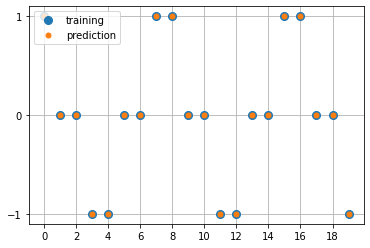

損失 [0.1055704653263092, 0.001590689062140882, 9.008868801174685e-05, 5.799066912004491e-06, 4.4509417307381227e-07, 4.935752784263059e-08, 1.3471664672692896e-08, 7.809892288435094e-09, 5.695831362118042e-09, 4.486466309572279e-09, 3.701861928107064e-09, 3.1566080860301327e-09, 2.7432645044456194e-09, 2.42166664499166e-09, 2.1544308559384717e-09, 1.929798765232249e-09, 1.7305736843553632e-09, 1.5566452571391665e-09, 1.4035332895900865e-09, 1.2634870927286102e-09]


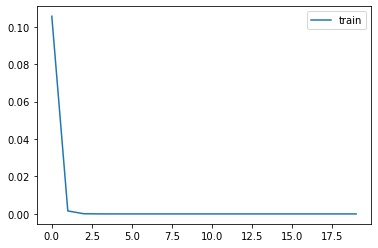

In [39]:
print("===== SimpleRNN =====")
model = Sequential()
model.add(SimpleRNN(10, activation="tanh", batch_input_shape=(None, timesteps, 1)))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(x, ydata, batch_size=100, epochs=20, verbose=0)
pred = model.predict(x)
plot(ydata, pred, history)

===== GRU =====


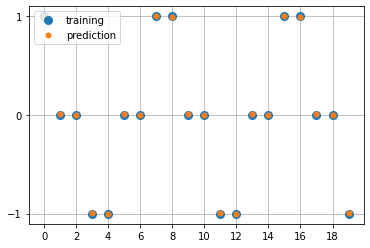

損失 [0.3927702307701111, 0.3156627416610718, 0.23133280873298645, 0.17333398759365082, 0.15258081257343292, 0.1465202122926712, 0.1431717872619629, 0.14034968614578247, 0.13784421980381012, 0.13539868593215942, 0.1332443356513977, 0.13141708076000214, 0.12948748469352722, 0.12783774733543396, 0.12625260651111603, 0.1247684583067894, 0.12319744378328323, 0.1218094527721405, 0.12056365609169006, 0.11933454126119614, 0.11812351644039154, 0.1170438751578331, 0.1158367171883583, 0.11487556993961334, 0.1137336939573288, 0.11272518336772919, 0.11181766539812088, 0.11073318868875504, 0.10970088094472885, 0.10866919159889221, 0.10778726637363434, 0.1067211925983429, 0.10562969744205475, 0.10463864356279373, 0.10362350195646286, 0.10251753777265549, 0.10139460861682892, 0.10020788013935089, 0.09903789311647415, 0.09769222140312195, 0.09641237556934357, 0.09517281502485275, 0.09371089935302734, 0.09220251441001892, 0.09054044634103775, 0.08904118090867996, 0.08728821575641632, 0.08545641601085663,

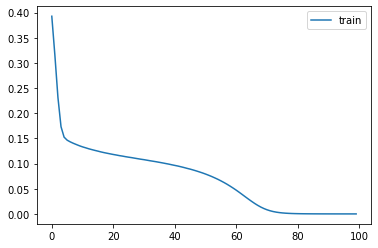

In [40]:
print("===== GRU =====")
model = Sequential()
model.add(GRU(10, activation="tanh", batch_input_shape=(None, timesteps, 1)))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(x, ydata, batch_size=100, epochs=100, verbose=0)
pred = model.predict(x)
plot(ydata, pred, history)


===== LSTM =====


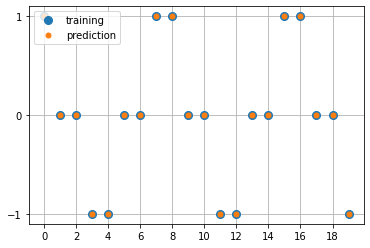

損失 [0.4722682535648346, 0.3674498200416565, 0.2627699673175812, 0.17504176497459412, 0.13029612600803375, 0.11622551828622818, 0.11268053948879242, 0.11164165288209915, 0.11100327968597412, 0.1106671690940857, 0.11016862094402313, 0.10972815006971359, 0.10925149917602539, 0.10889483243227005, 0.10841880738735199, 0.10804056376218796, 0.10751884430646896, 0.10725690424442291, 0.10688566416501999, 0.10639949887990952, 0.10601657629013062, 0.10572481155395508, 0.1052301675081253, 0.10494353622198105, 0.1044938862323761, 0.1041538417339325, 0.10371394455432892, 0.10326322913169861, 0.10295208543539047, 0.10241599380970001, 0.10204624384641647, 0.10168721526861191, 0.10120677202939987, 0.10071736574172974, 0.10027365386486053, 0.09973306953907013, 0.09941595792770386, 0.09887536615133286, 0.09839901328086853, 0.09795255959033966, 0.09736363589763641, 0.09688635170459747, 0.09645270556211472, 0.09593678265810013, 0.0953664556145668, 0.09489550441503525, 0.09432706236839294, 0.093774922192096

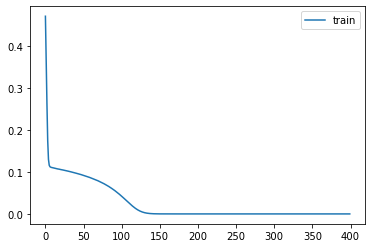

In [41]:
print("===== LSTM =====")
model = Sequential()
model.add(LSTM(10, activation="tanh", batch_input_shape=(None, timesteps, 1)))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(x, ydata, batch_size=100, epochs=400, verbose=0)
pred = model.predict(x)
plot(ydata, pred, history)

Epoch 1/3
95/95 [==============================] - 768s 8s/step - loss: 0.8125 - val_loss: 0.6855

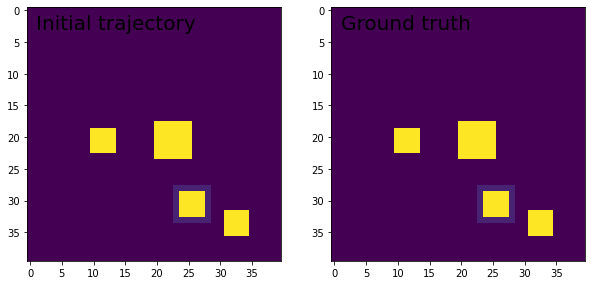

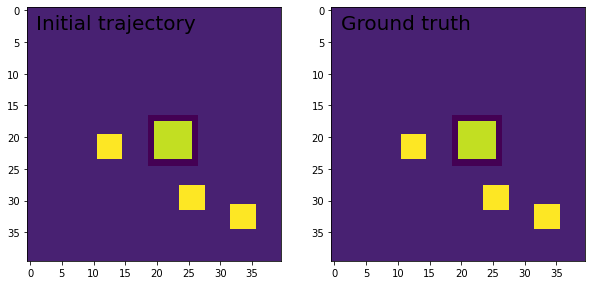

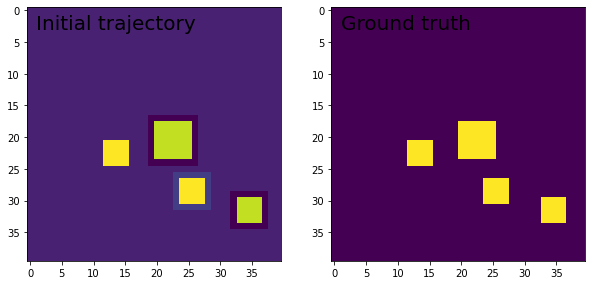

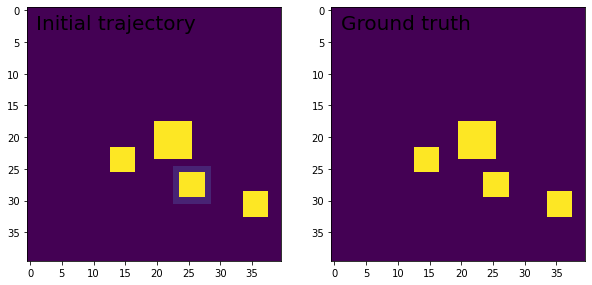

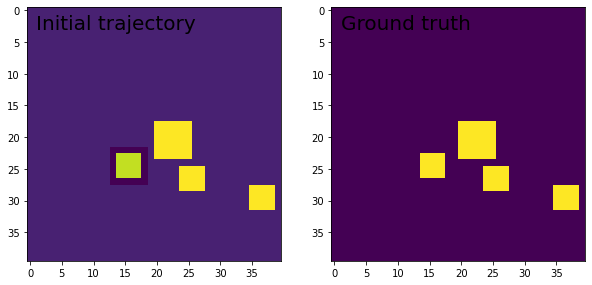

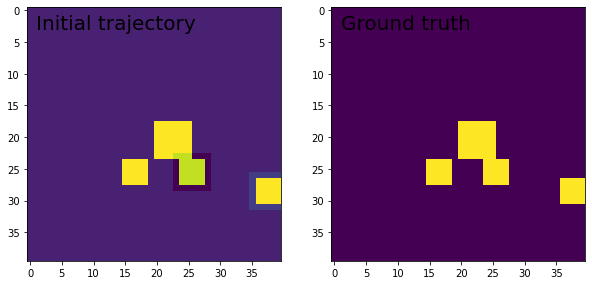

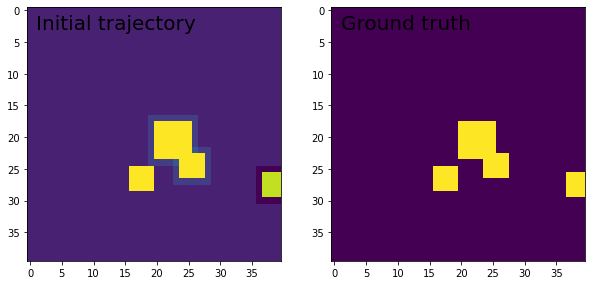

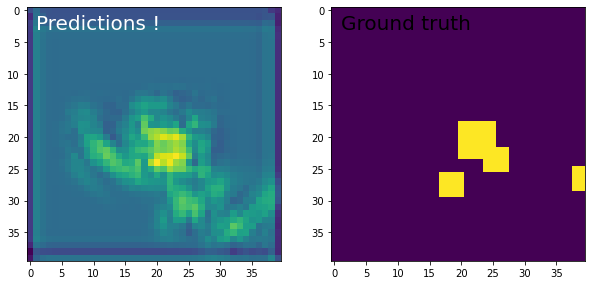

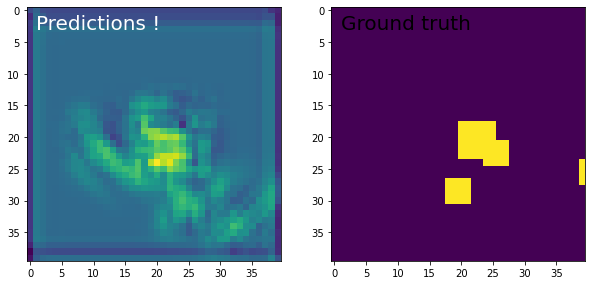

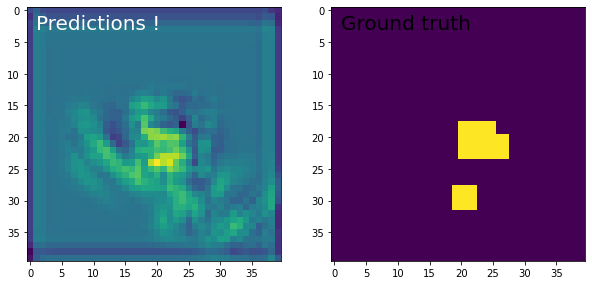

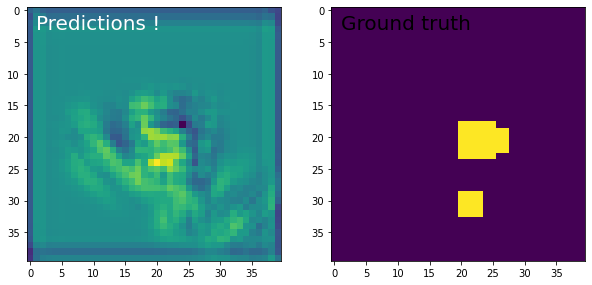

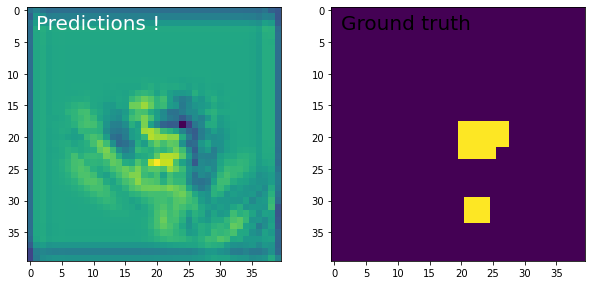

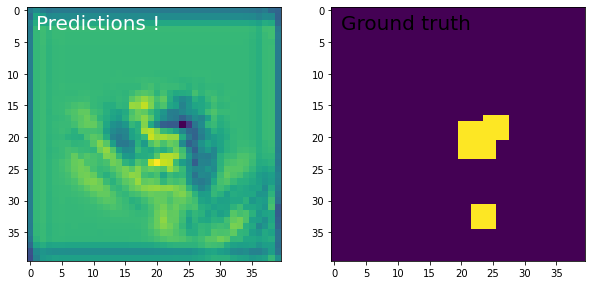

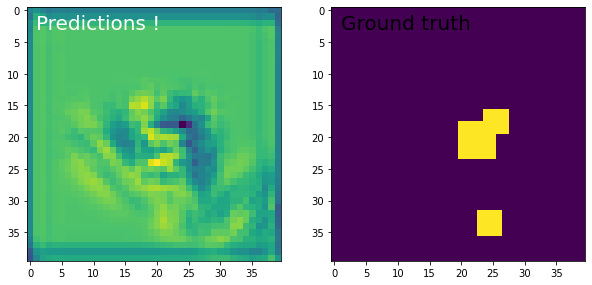

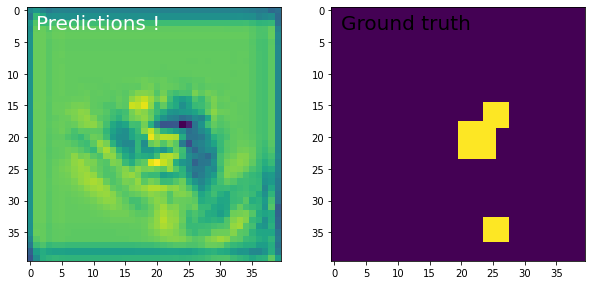

In [44]:
print("===== ConvLSTM2D =====")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from tensorflow.keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))




### 【問題3】他のクラスの説明

ドキュメントには他にも関連するクラスが記載されています。
それらがどういうものなのかを説明してください。
この中には実際に扱うことは少ないクラスも含まれています。

```
RNN
    時系列の情報に適した手法
    これまでのNNでは時系列の情報の喪失が多かったが、RNNによって改善された
    時系列データをそのまま利用できるようになっている

SimpleRNNCell
    SimpleRNNのCellの定義

GRUCell
    GRUのCellの定義

LSTMCell
    LSTMのCellの定義

StackedRNNCells
    RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー
    効率的なstacked RNNを実装するために使われる

CuDNNGRU
    CuDNNを利用した高速なGRU実装．
    TensorFlowバックエンドでGPU上でのみ動作

CuDNNLSTM
    CuDNNを利用した高速なLSTM実装．
    TensorFlowバックエンドでGPU上でのみ動作